In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
from warnings import filterwarnings 
filterwarnings('ignore')
from cartopy import crs, feature 

try:
    import gdown #This is to check whether the gdown is already installed if not then install
except:
    !pip install gdown #To wllow it run like your terminal or consol
    import gdown


In [4]:
#The file that you mostly need is what comes after the d
url="https://drive.google.com/file/d/1oJI2GUL3S4aPEzmtlaQb4tJ1LHhH9rM3/view?usp=share_link"
file_id=url.split('/')[-2]#This is to split the url based on / and select the second to last item
d_id='https://drive.google.com/uc?id='+file_id# To download the file
import os
if os.path.exists('Africa_cru_data.nc'):
    pass
else:
    gdown.download(d_id)

In [ ]:
# you can get all the python packages from the pypi.org site

Open and Close the netCDF data
=

In [5]:
file=xr.open_dataset('Africa_cru_data.nc') #To open the dataset 

In [7]:
file.close() # To close the data

In [10]:
file['pre']# ANother method is file.pre

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)>
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [11]:
type(file) #To check the type the dataset

xarray.core.dataset.Dataset

In [12]:
type(file['pre'])

xarray.core.dataarray.DataArray

In [14]:
file.data_vars #To check the data variables

Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...

In [17]:
file.pre.size

31536000

In [18]:
file.coords # To provide the coordinates

Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16

In [20]:
da=file.pre

In [25]:
da.sel(lon=-19.22,method='nearest')# You can use ffill or bfill

<xarray.DataArray 'pre' (time: 1440, lat: 146)>
[210240 values with dtype=float32]
Coordinates:
    lon      float32 -19.25
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

Area Selection/Slicing
=

In [29]:
da.sel(lon=slice(-4,5), time=slice('2019-01','2020-12'))

<xarray.DataArray 'pre' (time: 24, lat: 146, lon: 18)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [21.300001, 17.7     , ...,       nan,       nan],
        [20.7     , 15.6     , ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 5.4     ,  6.6     , ...,       nan,       nan],
        [ 7.2     ,  5.5     , ...,       nan,       nan]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [51.9     , 43.9     , ...,       nan,       nan],
        [59.3     , 53.4     , ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [21.      , 21.800001, ...,       nan,       nan],
        [25.2     , 20.5     , ...,       nan,       nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.75 -3.25 -2.75 -2.25 -1.75 ... 3.25 3.75 4.25 4.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 2019-01-16 2019-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

Changing Longitude Convertion (0--360 to -180--180) for a global dataset
=

change 0--360 range
=

In [30]:
file.coords['lon']=(file.coords['lon']+360)%360
file=file.sortby(file.lon)

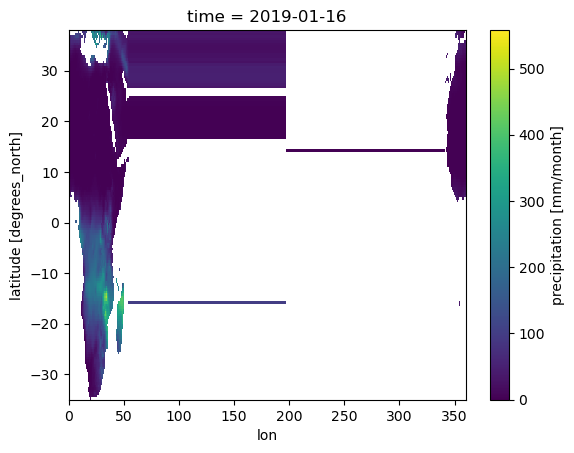

In [32]:
file.pre.sel(time='2019-01').plot()

Converting to -180--180 range
=

In [33]:
file.coords['lon']=(file.coords['lon']+180)%360-180
file=file.sortby(file.lon)

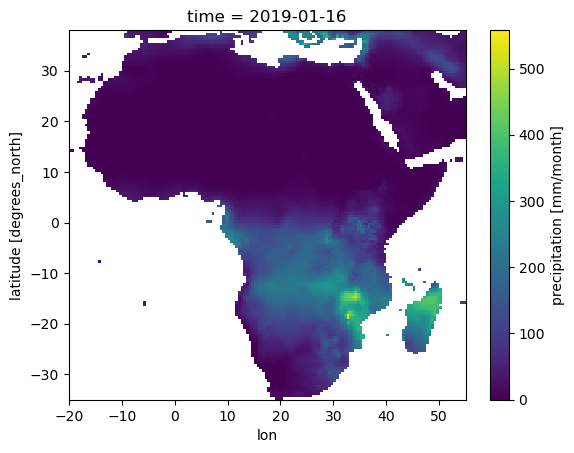

In [34]:
file.pre.sel(time='2019-01').plot()

Groupby/Resampling
=
Producing Annual Totals/Annual Means

In [35]:
a1=da.groupby('time.year').sum('time')

In [38]:
a1.sel(year=2020)# This is because the year is an integer

<xarray.DataArray 'pre' (lat: 146, lon: 150)>
array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [  0.     ,   0.     ,   0.     , ..., 170.     , 186.6    ,
        197.2    ],
       [  0.     ,   0.     ,   0.     , ..., 171.3    , 151.5    ,
        148.40001],
       [  0.     ,   0.     ,   0.     , ...,   0.     , 159.4    ,
        164.79999]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
    year     int64 2020

In [41]:
a2=da.groupby('time.year').mean('time')# Yearly mean

In [45]:
a3=da.groupby('time.month').mean('time')# monthly mean


In [47]:
a4=da.groupby('time.season').sum('time')# Seasonal mean

In [51]:
a4.sel(season='SON')

<xarray.DataArray 'pre' (lat: 146, lon: 150)>
array([[   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ..., 4064.0015, 3828.9995,
        3476.099 ],
       [   0.    ,    0.    ,    0.    , ..., 4968.4995, 4826.501 ,
        4138.9004],
       [   0.    ,    0.    ,    0.    , ...,    0.    , 5615.803 ,
        4914.4976]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
    season   <U3 'SON'

Resampling 
=
Handles both downsampling and upsampling. The resampled dimension must be a datetime-like coordinate. If any intervals contain no values from the original object, they will be given the value NaN.

In [53]:
da.resample(time='1Y').mean('time')

<xarray.DataArray 'pre' (time: 120, lat: 146, lon: 150)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 13.475001 ,
         16.008333 , 17.783335 ],
        [       nan,        nan,        nan, ..., 14.025001 ,
         14.141667 , 13.658334 ],
        [       nan,        nan,        nan, ...,        nan,
         15.441667 , 15.099999 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ..., 11.016666 ,
         13.549999 , 15.775002 ],
        [       nan,        nan,        nan, ..., 12.400001 ,
         12.075001 , 12.358335 ],
        [       nan,        nan,        nan, ...,        nan,
         14.224999 , 14.858334 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 14.166667 ,
         15.55     , 16.433332 ],
        [       nan,        nan,        nan, ..., 14.275001 ,
         12.625    , 12.366668 ],
        [       nan,        nan,        nan, ...,        nan,
         13.283333 , 13.733333 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1901-12-31 1902-12-31 ... 2020-12-31
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75

In [54]:
da.resample(time='3MS').mean('time')#Three months intervals

<xarray.DataArray 'pre' (time: 480, lat: 146, lon: 150)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., 14.866666  ,
         19.933334  , 21.966667  ],
        [        nan,         nan,         nan, ..., 16.633333  ,
         16.433334  , 17.766668  ],
        [        nan,         nan,         nan, ...,         nan,
         16.966667  , 18.400002  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  0.83333343,
          1.9333334 ,  3.8333333 ],
        [        nan,         nan,         nan, ...,  1.2       ,
          2.0333335 ,  1.1       ],
        [        nan,         nan,         nan, ...,         nan,
          3.466667  ,  2.8333333 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., 18.4       ,
         15.533334  , 12.866668  ],
        [        nan,         nan,         nan, ..., 19.633333  ,
         16.6       , 14.233334  ],
        [        nan,         nan,         nan, ...,         nan,
         16.5       , 14.966667  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-04-01 ... 2020-10-01
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75

In [55]:
da.resample(time='QS-Jan').mean('time')

<xarray.DataArray 'pre' (time: 480, lat: 146, lon: 150)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., 14.866666  ,
         19.933334  , 21.966667  ],
        [        nan,         nan,         nan, ..., 16.633333  ,
         16.433334  , 17.766668  ],
        [        nan,         nan,         nan, ...,         nan,
         16.966667  , 18.400002  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  0.83333343,
          1.9333334 ,  3.8333333 ],
        [        nan,         nan,         nan, ...,  1.2       ,
          2.0333335 ,  1.1       ],
        [        nan,         nan,         nan, ...,         nan,
          3.466667  ,  2.8333333 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., 18.4       ,
         15.533334  , 12.866668  ],
        [        nan,         nan,         nan, ..., 19.633333  ,
         16.6       , 14.233334  ],
        [        nan,         nan,         nan, ...,         nan,
         16.5       , 14.966667  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-04-01 ... 2020-10-01
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75

Simple Visualizations
=
1D - line plots 
2D - Spatial / contour plots
3D ++ - Histogram

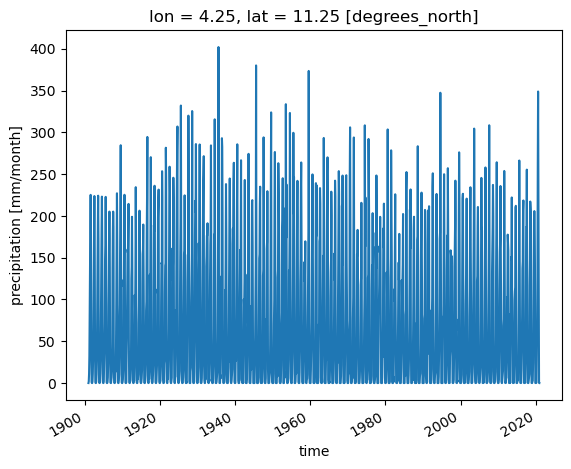

In [56]:
file.pre.sel(lon=4, lat=11, method='nearest').plot()#A line plot

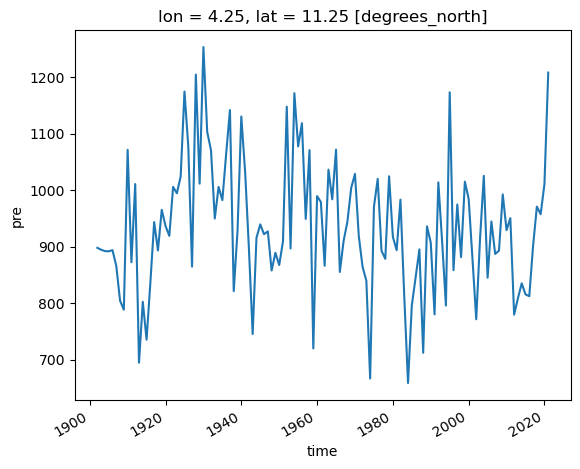

In [57]:
file.pre.sel(lon=4, lat=11, method='nearest').resample(time='Y').sum('time').plot()#1D plot

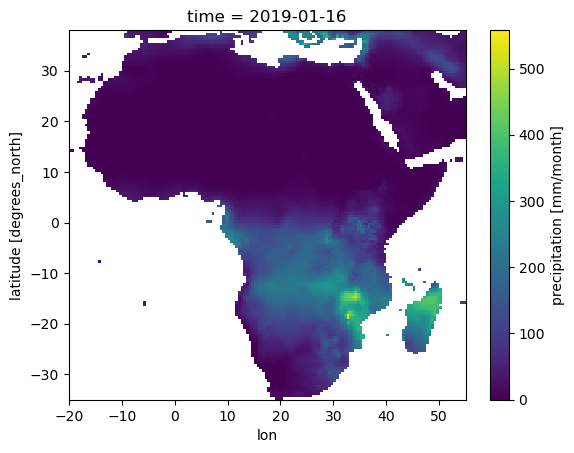

In [60]:
file.pre.sel(time='2019-01').plot()#2D plot

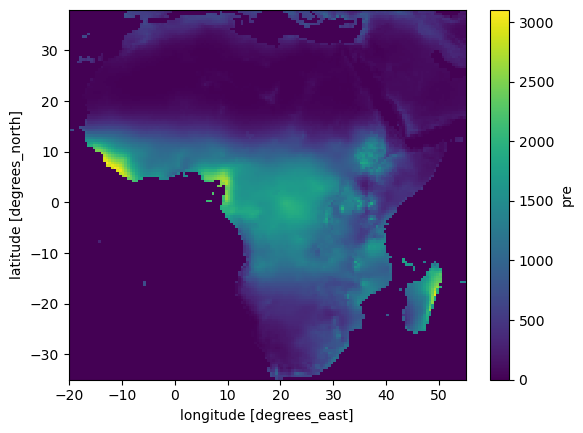

In [62]:
da.groupby('time.year').sum('time').mean('year').plot()# yearly climatology

(array([1.15768e+05, 1.79790e+04, 1.15810e+04, 2.88200e+03, 6.99000e+02,
        2.55000e+02, 9.40000e+01, 2.90000e+01, 1.10000e+01, 6.00000e+00]),
 array([  0.     ,  85.86   , 171.72   , 257.58002, 343.44   , 429.30002,
        515.16003, 601.02   , 686.88   , 772.74005, 858.60004],
       dtype=float32),
 <BarContainer object of 10 artists>)

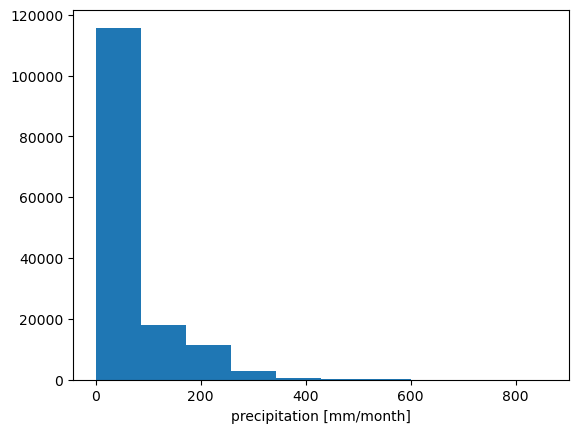

In [63]:
file.pre.sel(time=slice('2020-01','2020-12')).plot()#3D plot

In [3]:
4==5

False

ENERGY
=
Types of Energy

In [5]:
7%3 # This is the remainder theorem

1

In [8]:
7//3 # This gives the whole number of the fraction 


2

In [11]:
(4**2)**2

256

In [10]:
4**4

256

In [14]:
np.abs(-9)# Absolute number

9

In [16]:
r=[12,3,4,5,6,7,8,9,13]

In [17]:
np.max(r)

13

In [18]:
np.median(r)

7.0

In [19]:
g=np.sum(r)

In [22]:
print('fvvjvjv')

fvvjvjv


In [49]:
print("kmvnvnvnvnvnvnvn")

kmvnvnvnvnvnvnvn 
kmvnvnvnvnvnvnvn 
kmvnvnvnvnvnvnvn 



In [32]:
input('Pls enter your name ')

Pls enter your name SJVJSdN


'SJVJSdN'

In [37]:
Y=int(input('How old are you?  '))
print('You are ',Y,'old')

How old are you?  25
You are  25 old


In [41]:
o='Ayitah'
for h in o:
    print(h)

A
y
i
t
a
h


In [125]:
for e,f in enumerate(w):#This gives both the position and the values
    print(e,f)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12


In [46]:
#Five times table
w=[1,2,3,4,5,6,7,8,9,10,11,12]
g=[5]
for j in w:# This gives only the values
    for k in g:
        s=k*j        
    print(k,' * ',j,' = ',s)

5  *  1  =  5
5  *  2  =  10
5  *  3  =  15
5  *  4  =  20
5  *  5  =  25
5  *  6  =  30
5  *  7  =  35
5  *  8  =  40
5  *  9  =  45
5  *  10  =  50
5  *  11  =  55
5  *  12  =  60


In [50]:
print('School dey biii\n'*2)

School dey biii
School dey biii



In [73]:
r=np.arange(1,365)
l=np.random.randn(200)

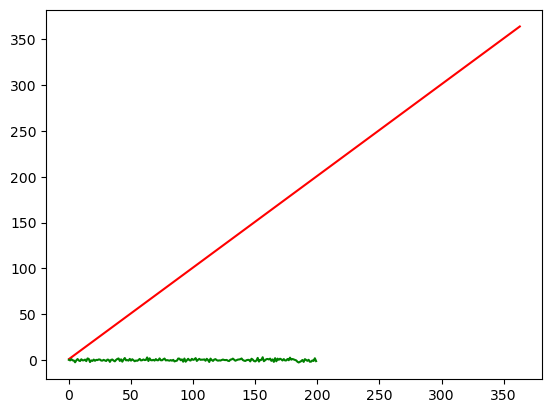

In [74]:
plt.plot(r,color='red')
plt.plot(l,color='green')

In [75]:
T=np.arange(1,22,2)

In [76]:
T

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [83]:
H=np.arange(2,24,2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


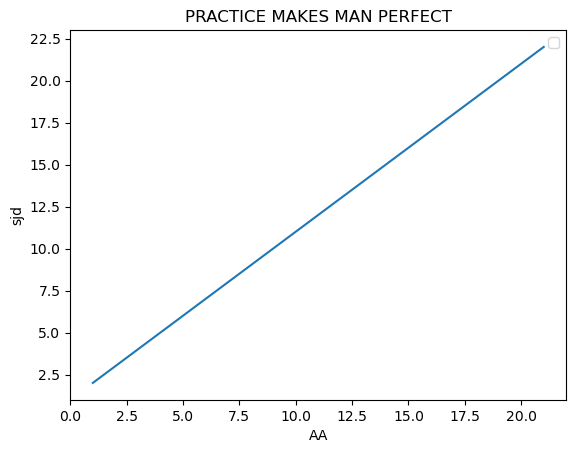

In [100]:
plt.plot(T,H)
plt.xlabel('AA')
plt.ylabel('sjd')
plt.title('PRACTICE MAKES MAN PERFECT')
plt.legend()

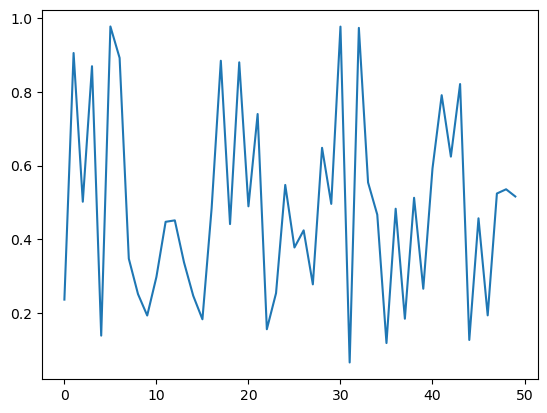

In [103]:
n=np.random.rand(50)
plt.plot(n)

In [104]:
if 2==4:
    print('Yes')
else:
    print('no')

no


In [107]:
'Kofi is smart' if 4==4 else 'no'

'Kofi is smart'

In [118]:
len(indices)//(c+1)

2

In [124]:
for i,j in enumerate(indices):
    print(i,j)

0 20
1 50
2 100
3 2000
4 30
5 250
6 300
7 30


In [ ]:
axes[0,0]

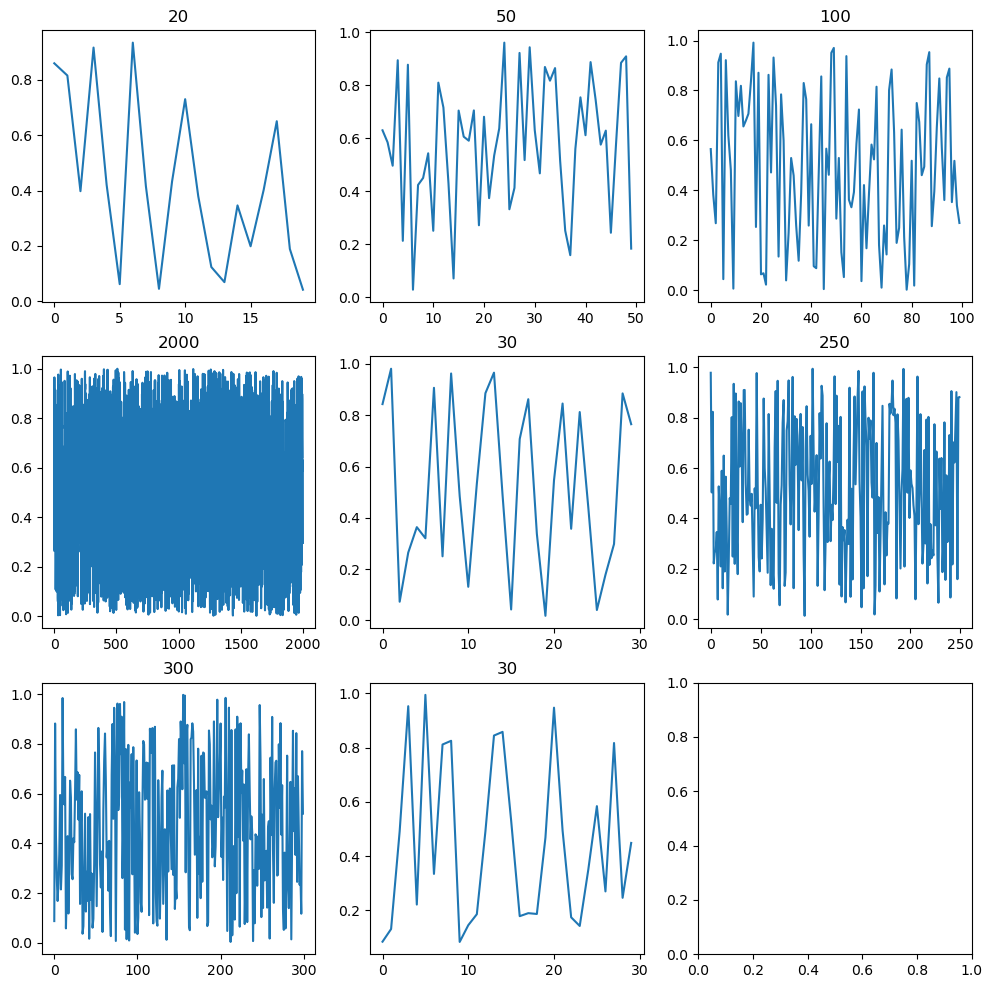

In [152]:
indices = [20, 50, 100, 2000, 30, 250,300, 30,]
c = 3
r = len(indices)//c if len(indices)%c == 0 else len(indices)//c+1
fig, axes = plt.subplots(ncols=r, nrows=r, figsize=(12, 12))
for i,j in enumerate(indices):
    axes[i//c,i%c].plot(np.random.rand(j))
    axes[i//c,i%c].set_title(str(j))

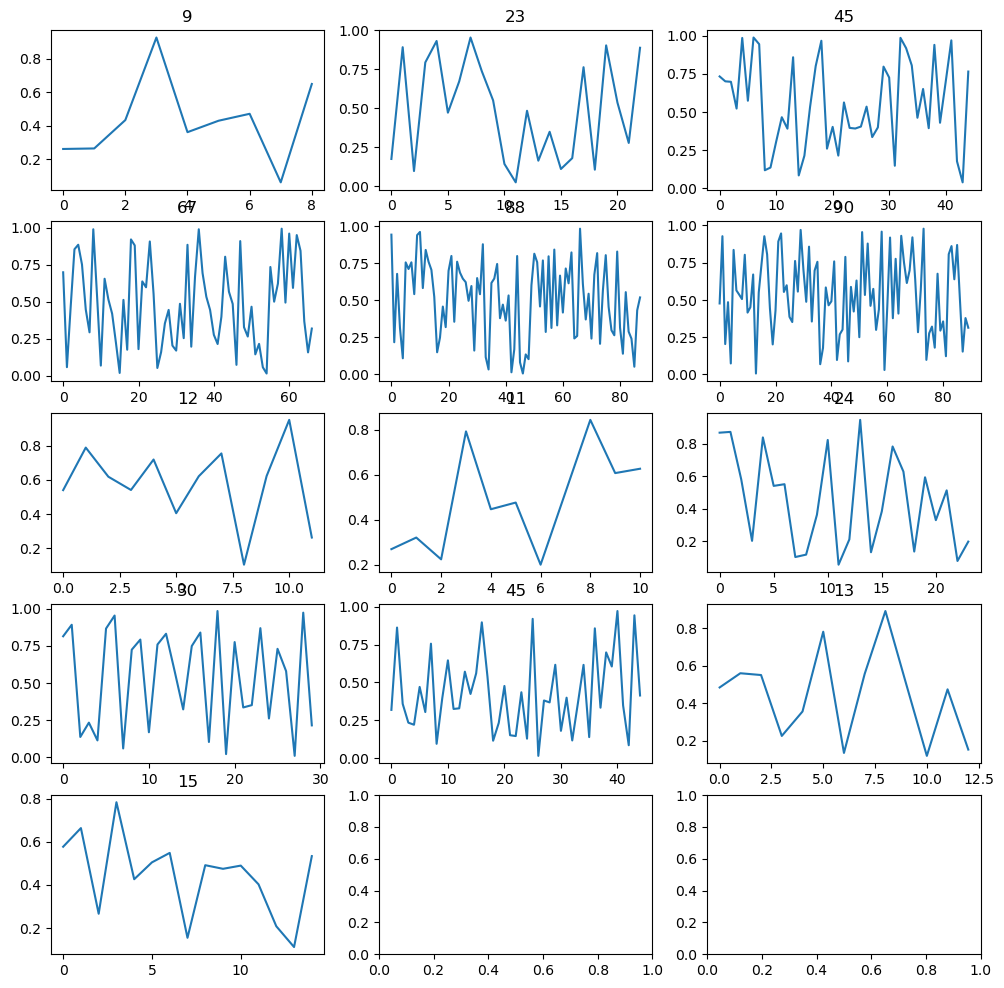

In [156]:
m=[9,23,45,67,88,90,12,11,24,30,45,13,15]
l=3
h=len(m)//l if len(m)%l==0 else len(m)//l+1
fig,axes=plt.subplots(ncols=l,nrows=h,figsize=(12,12))
for g,d in enumerate(m):
    axes[g//l,g%l].plot(np.random.rand(d))
    axes[g//l,g%l].set_title(str(d))

In [5]:
Gh=np.arange(1,20)

In [4]:
sh=np.arange(21,40)

In [6]:
lh=np.arange(40,60)

In [7]:
R=np.arange(1,100)

In [8]:
r=np.sum(R)

In [9]:
LH=np.sum(lh)

In [11]:
SH=np.sum(sh)

In [14]:
def gg(a,b,c,f):
    a=b+c+f
    return a

In [15]:
gg(r,LH,SH,np.sum(Gh))

1750

In [30]:
r-np.sum(Gh)//LH+SH

5520

In [1]:
g=("Menu","1) Transfer Money","2) MoMoPay & Pay Bill","3) Airtime & Bundles","4) Allow Cashout","5) Financial Service","6) My Wallet")
n=("Transfer Money ",'1) MoMo User',"2) Non MoMo User","3) Send with care","4) Favorite","5) Other Network","6) Bank Account","0) Back")
a=("MoMoPay & Pay Bill","1) MoMoPay","2) Pay Bill","3) GhQR","0) Back")
q=('Airtime & Bundles','1) Airtime','2) Internet Bundles','3) Fixed Broadband','4) Schedule Airtime',"0) Back")
e=('Allow Cashout','1) Yes','2) No','0) Back')
r=('Financial Service','1) Bank Service','2) Savings','3) Loans','4) Pensions and Investiments','5) insurance','6) Trade Share','0) Back')
t=('My Wallet','1) Check Balance','2) Allow Cash Out','3) My Approvals','4) Report Fraud','5) Statements','6) Change & Reset PIN')
y=('Send with care','1) Mobile User','MyCaretaker','AYO Send with Care Balances or Claim','0) Back')
u=('Favorite','1) Name','2) find','0) Back')
i=('Other Network','1) AirtelTigo','2) Vodafone','3) E-zwich','4) G-Money','5) Zeepay','6) GhanaPay','0) Back')













In [ ]:
w=input('Dial *170# to do any transaction on momo ')
if w =='*170#':
    for G in g:
        print(G)
    d=int(input(' '))
    if d ==1:
        for v in n:
            print(v)
        z=int(input(' '))
        if z==1:
            p=int(input('Enter mobile number '))
            if len(str(p))==9:
                i=int(input('Confirm number'))
                if p==i and len(str(i))==9:
                    int(input('Enter Amount '))
                    input('Enter Refernce ')
                    c=int(input('Enter Your PIN'))
                    if len(str(c))==4:
                        print('Done')
                    else:
                        print('Incorrect PIN')
        elif z==2:
            b=input('Enter Receiver Name')
            int(input('Enter Amount '))
            input('Enter Refernce ')
            s=int(input('Enter Secret Code '))
            if len(str(s))==4:
                j=int(input('Confirm Secret Code'))
                if s==j and len(str(j))==4:
                    x=int(input('Enter Your PIN'))
                    if len(str(x))==4:
                        print('Done')
                else:
                    print('Incorrect PIN')
        elif z==3:
            for Y in y:
                print(Y)
        elif z==4:
            for U in u:
                print(U)
        elif z==5:
            for I in i:
                print(I)
                
            
    elif d==2:
        for A in a:
            print(A)
    elif d==3:
        for Q in q:
            print(Q)
    elif d==4:
        for E in e:
            print(E)
    elif d==6:
        for T in t:
            print(T)
elif w!="*170#":
    print('Unknown Application')
    
    

In [7]:
dst=xr.open_dataset('PDIR_Rainfall.nc')

In [8]:
dst


<xarray.Dataset>
Dimensions:   (datetime: 7306, lon: 113, lat: 163)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-03-01 2001-03-02 ... 2021-03-01
  * lon       (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat       (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Aug 23 20:41:44 2022: cdo -f nc -b F64 mergetime PDIR_G...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [9]:
dst.precip

<xarray.DataArray 'precip' (datetime: 7306, lat: 163, lon: 113)>
[134569214 values with dtype=float64]
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-03-01 2001-03-02 ... 2021-03-01
  * lon       (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat       (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
Attributes:
    grid_mapping:  crs

In [22]:
seas_dat

<xarray.DataArray 'precip' (month: 12, lat: 163, lon: 113)>
array([[[-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        ...,
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08]],

       [[-2.41639200e+08, -2.41639200e+08, -2.41639200e+08, ...,
         -2.41639200e+08, -2.41639200e+08, -2.41639200e+08],
        [-2.41639200e+08, -2.41639200e+08, -2.41639200e+08, ...,
         -2.41639200e+08, -2.41639200e+08, -2.41639200e+08],
        [-2.41639200e+08, -2.41639200e+08, -2.41639200e+08, ...,
         -2.41639200e+08, -2.41639200e+08, -2.41639200e+08],
...
        [-2.56608000e+08, -2.56608000e+08, -2.56608000e+08, ...,
         -2.56608000e+08, -2.56608000e+08, -2.56608000e+08],
        [-2.56608000e+08, -2.56608000e+08, -2.56608000e+08, ...,
         -2.56608000e+08, -2.56608000e+08, -2.56608000e+08],
        [-2.56608000e+08, -2.56608000e+08, -2.56608000e+08, ...,
         -2.56608000e+08, -2.56608000e+08, -2.56608000e+08]],

       [[-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        ...,
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08],
        [-2.65161600e+08, -2.65161600e+08, -2.65161600e+08, ...,
         -2.65161600e+08, -2.65161600e+08, -2.65161600e+08]]])
Coordinates:
  * lon      (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat      (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [24]:
seas_dat=dst.resample(datetime='M').sum('datetime').groupby('datetime.month').mean('datetime')['precip']*86400

In [26]:
dst.close()

In [30]:
fig,axes=plt.subplots(ncols=2, nrows=2,figsize=(15,10),subplot_kw={'projection':crs.PlateCarree()})
plt.subplots_adjust(bottom=0.2, wspace=0.5,hspace=0.5)
seas_dat[1].plot(axes=[0,0],add_colorbar=False, vmin=50, vmax=300)


seas_dat[2].plot(axes=[0,1],add_colorbar=False, vmin=50, vmax=300)

seas_dat[3].plot(axes=[1,0],add_colorbar=False, vmin=50, vmax=300)



cb=seas_dat[4].plot(axes=[1,1],add_colorbar=False, vmin=50, vmax=300)

cax=fig.add_axes([0.175,0.1,0.65,0.02])

cbar=fig.colorbar(cb,cax=cax, orientation='horizontal',extend='both',)

cbar.ax.tick_params(labelsize=24)

# cbar.set_label()



ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1500x1000 with 0 Axes>

In [28]:
np.size(seas_dat)

221028